In [ ]:

from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

 cnn_mnist_weights.h5   GLI			 SVHN_single_grey1.h5
'Colab Notebooks'       human_activity.csv	 VGG16_customization.ipynb
'Getting started.pdf'   SVHN_NN_Solution.ipynb


In [ ]:
import h5py
import numpy as np

# Open the file as readonly
h5f = h5py.File("/content/drive/My Drive/SVHN_single_grey1.h5", 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]




In [ ]:
list(h5f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [ ]:
dset = h5f['X_test']

In [ ]:
dset.shape

(18000, 32, 32)

In [ ]:
dset[0]

array([[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904, 112.1646],
       [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475, 109.9368],
       [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414, 109.1048],
       ...,
       [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074, 112.7346],
       [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 , 114.3431],
       [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017, 114.1906]],
      dtype=float32)

In [ ]:
# Close this file
h5f.close()

In [ ]:
## Importing the required basic libaries for data processing
import numpy as np
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

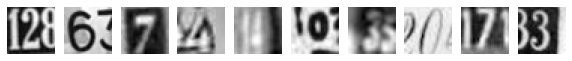

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train1[0:10]))

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Training set', X_train.shape, y_train1.shape)
print('Test set', X_test.shape, y_test1.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


In [ ]:
print(X_test.shape)
print(y_test1.shape)

(18000, 1024)
(18000,)


In [ ]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train1)
y_test = np_utils.to_categorical(y_test1)

# no.of classes
num_classes = y_test.shape[1]
num_hidden = 32

In [ ]:
num_classes

10

In [ ]:
x_tr = []
for i in range(42000):
    x_tr.append(X_train[i,:].flatten())  # This step is alternative to the reshape function used earlier. This is redundant shown only for information
x_te = []
for i in range(18000):
    x_te.append(X_test[i,:].flatten())   # Same comment as above

In [ ]:
x_tr =x_tr[:2000]     # Reducing the file size to 2000 records to make training faster in the classroom sessions
x_te =x_te[:2000]     # Instead we should use train_test split function to ensure we do not introduce any bias in categories

In [ ]:
y_tr = y_train1[0:2000]
y_te = y_test1[0:2000]

In [ ]:
print(len(x_tr))
print(len(y_tr))
print(len(x_te))
print(len(y_tr))

2000
2000
2000
2000


In [ ]:
a =[]
j = []
def knnvalue(k):
    from sklearn.neighbors import KNeighborsClassifier
    NNH = KNeighborsClassifier(n_neighbors= k , weights = 'uniform', metric='euclidean')
    NNH.fit(x_tr, y_tr)
    predicted_labels = NNH.predict(x_te)
    from sklearn.metrics import accuracy_score
    ascore = accuracy_score(y_te, predicted_labels)
    MSE = 1-ascore
    a.append(MSE)
    j.append(k)
    print(ascore)

In [ ]:
for i in range(1,30,2):
    knnvalue(i)

0.2975
0.292
0.3015
0.307
0.3055
0.311
0.2975
0.294
0.2975
0.2935
0.2945
0.2955
0.2865
0.2805
0.279


In [ ]:
#From the above run, the max accuracy is attained at k value of 1. Now lets train the model for k value of 
#30 and print the metrics
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 6 , weights = 'uniform', metric='euclidean')
NNH.fit(x_tr, y_tr)
pred=NNH.predict(x_te)

In [ ]:
pred[0]

6

In [ ]:
y_test1[0]

1

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred,y_te)

array([[104,  17,  22,  28,  29,  36,  40,  14,  51,  43],
       [ 11, 101,  25,  31,  23,  26,  22,  27,  19,  15],
       [ 12,  18,  71,  22,  20,  18,  16,  49,  17,  24],
       [ 15,   9,  18,  33,  11,  20,  12,  19,  20,  15],
       [ 15,  14,   8,  13,  84,  15,  20,   9,  10,   9],
       [ 10,   6,   8,  22,   6,  46,  11,   3,  11,  13],
       [ 26,  12,   6,   9,  11,  16,  53,   5,  30,  19],
       [  4,   5,  16,   9,   4,   6,   3,  72,   6,  10],
       [  6,   2,   4,   9,   4,  10,  13,   2,  22,  16],
       [ 18,   1,   9,   9,  12,  18,  12,   5,  12,  38]])

In [ ]:
from sklearn.metrics import classification_report

cr= classification_report(y_te,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.27      0.47      0.34       221
           1       0.34      0.55      0.42       185
           2       0.27      0.38      0.31       187
           3       0.19      0.18      0.18       185
           4       0.43      0.41      0.42       204
           5       0.34      0.22      0.27       211
           6       0.28      0.26      0.27       202
           7       0.53      0.35      0.42       205
           8       0.25      0.11      0.15       198
           9       0.28      0.19      0.23       202

    accuracy                           0.31      2000
   macro avg       0.32      0.31      0.30      2000
weighted avg       0.32      0.31      0.30      2000



The accuracy of the KNN model is very poor. 

## Neural Network Model

In [ ]:
# Import the required libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Adagrad, Adadelta
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.activations import relu

In [ ]:
# define model




def nn_model():
    # create model
    num_classes = 10
    model = Sequential()
    model.add(Dense(1024, input_shape=(1024,)))   #First hidden layer of 1024  neurons, each neuron takes input 
    #model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
    model.add(tf.keras.layers.PReLU(alpha_initializer='glorot_normal'))
                                                
    model.add(Dense(512 ))




                                                               


    model.add(Dense(num_classes, activation='softmax'))        # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 

    # Optimizers 
    adam = Adam(lr=0.0001)
    rms = RMSprop(lr=0.001)
    sgd = SGD(lr = 0.001)
    agr = Adagrad(lr=0.05, initial_accumulator_value=0.1, epsilon=1e-07 )
    adl = Adadelta(lr=0.0001)



    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer= adam , metrics=['accuracy']) ### Loss function = Categorical cross entropy
    return model



In [ ]:
# build the model
model = nn_model()


model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
p_re_lu_5 (PReLU)            (None, 1024)              1024      
_________________________________________________________________
dense_24 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                5130      
Total params: 1,580,554
Trainable params: 1,580,554
Non-trainable params: 0
_________________________________________________________________


In [ ]:



#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )

# Fit the model
#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=256, verbose=2 , callbacks = es)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=256, verbose=2 )

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

print("Error: %.2f%%" % (100-scores[1]*100))

model.summary()

Epoch 1/30
165/165 - 1s - loss: 2.2064 - accuracy: 0.2270 - val_loss: 2.0085 - val_accuracy: 0.3233
Epoch 2/30
165/165 - 1s - loss: 1.7640 - accuracy: 0.4776 - val_loss: 1.5480 - val_accuracy: 0.5601
Epoch 3/30
165/165 - 1s - loss: 1.4113 - accuracy: 0.5910 - val_loss: 1.2971 - val_accuracy: 0.6207
Epoch 4/30
165/165 - 1s - loss: 1.2209 - accuracy: 0.6486 - val_loss: 1.1904 - val_accuracy: 0.6442
Epoch 5/30
165/165 - 1s - loss: 1.1074 - accuracy: 0.6820 - val_loss: 1.1114 - val_accuracy: 0.6647
Epoch 6/30
165/165 - 1s - loss: 1.0292 - accuracy: 0.7003 - val_loss: 1.0055 - val_accuracy: 0.7024
Epoch 7/30
165/165 - 1s - loss: 0.9677 - accuracy: 0.7159 - val_loss: 0.9713 - val_accuracy: 0.7085
Epoch 8/30
165/165 - 1s - loss: 0.9141 - accuracy: 0.7324 - val_loss: 0.9612 - val_accuracy: 0.7030
Epoch 9/30
165/165 - 1s - loss: 0.8776 - accuracy: 0.7438 - val_loss: 0.8993 - val_accuracy: 0.7285
Epoch 10/30
165/165 - 1s - loss: 0.8384 - accuracy: 0.7542 - val_loss: 0.9163 - val_accuracy: 0.7208

In [ ]:
for l in model.layers:
  print (l.name, l.input_shape,'==>',l.output_shape)
  print()

model.summary()

dense_3 (None, 1024) ==> (None, 1024)

dense_4 (None, 1024) ==> (None, 10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10250     
Total params: 1,059,850
Trainable params: 1,059,850
Non-trainable params: 0
_________________________________________________________________


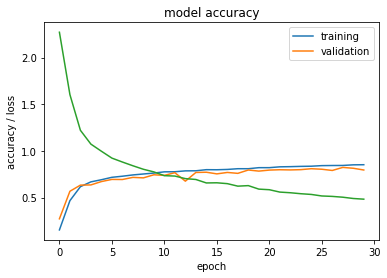

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

# <u>Note</u>
### Make sure the training and validation scores do not deviate significantly. If it does, you are most likely in overfit zone

### Early stopping can adversly effect the model (stops improvising early)
### However, not earlystopping shows the validation accuracy curve fluctuating
### indicating variance error challenges

### Pl. note... these observations are in the context of the set hyper parameter values
